<a href="https://colab.research.google.com/github/asmaalkurbi/bodyfat/blob/main/bodyfatdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Load libraries and dataset

In [1]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, chi2_contingency, shapiro, ttest_1samp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB

In [2]:
# load the dataset bodyfat
body = pd.read_csv('bodyfat.csv')
body

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


### Descriptive stats of the whole dataset

In [3]:
# full description of the dataset body
body.describe().T

,count,mean,std,min,25%,50%,75%,max
Density,252.0,1.055574,0.019031,0.995,1.0414,1.0549,1.0704,1.1089
BodyFat,252.0,19.150794,8.368740,0.000,12.4750,19.2000,25.3000,47.5000
Age,252.0,44.884921,12.602040,22.000,35.7500,43.0000,54.0000,81.0000
Weight,252.0,178.924405,29.389160,118.500,159.0000,176.5000,197.0000,363.1500
Height,252.0,70.148810,3.662856,29.500,68.2500,70.0000,72.2500,77.7500
Neck,252.0,37.992063,2.430913,31.100,36.4000,38.0000,39.4250,51.2000
Chest,252.0,100.824206,8.430476,79.300,94.3500,99.6500,105.3750,136.2000
Abdomen,252.0,92.555952,10.783077,69.400,84.5750,90.9500,99.3250,148.1000
Hip,252.0,99.904762,7.164058,85.000,95.5000,99.3000,103.5250,147.7000
Thigh,252.0,59.405952,5.249952,47.200,56.0000,59.0000,62.3500,87.3000


In [4]:
# describe the data types of the variables
body.dtypes

,0
Density,float64
BodyFat,float64
Age,int64
Weight,float64
Height,float64
Neck,float64
Chest,float64
Abdomen,float64
Hip,float64
Thigh,float64


### Random Sampling

In [5]:
# random sampling from body dataset
body_random = body.sample(n=150)
body_random

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
202,1.0340,28.7,43,200.50,71.50,37.9,107.2,103.1,105.5,68.8,38.3,23.7,32.1,28.9,18.7
147,1.0322,29.6,25,206.50,69.75,40.9,110.9,100.5,106.2,68.4,40.8,24.6,33.3,29.7,18.4
245,1.0641,15.2,68,155.50,69.25,36.3,97.4,84.3,94.4,54.3,37.5,22.6,29.2,27.3,18.5
39,1.0258,32.6,50,203.00,67.00,40.2,114.8,108.1,102.5,61.3,41.1,24.7,34.1,31.0,18.3
93,1.0424,24.9,46,192.50,71.75,38.0,106.6,97.5,100.6,58.9,40.5,24.5,33.3,29.6,19.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,1.0730,11.3,50,162.50,66.50,38.7,99.4,86.7,96.2,62.1,39.3,23.3,30.6,27.8,18.2
52,1.0807,8.0,51,137.25,67.75,36.5,89.7,82.0,89.1,49.3,33.7,21.4,29.6,26.0,16.9
166,1.0492,21.8,35,166.25,68.00,38.5,99.1,90.4,95.6,55.5,34.2,21.9,30.2,28.7,17.7
67,1.0673,13.8,55,154.75,71.50,36.9,95.4,86.6,91.8,54.3,35.4,21.5,32.8,27.4,18.7


In [6]:
# describe the BodyFat (the dependent variable) from the sample
body_random['BodyFat'].describe()

,BodyFat
count,150.000000
mean,19.319333
std,8.543184
min,0.700000
25%,12.625000
50%,19.550000
75%,25.300000
max,47.500000


In [7]:
# get the averBodyFat BodyFat
print('the average BodyFat is', round(body_random['BodyFat'].mean(),2))

# get the standard deviation of the BodyFat
print('the standard deviation of BodyFat is', round(body_random['BodyFat'].std(),2))

# get the mode of BodyFat
print('the modes of BodyFat are', body_random['BodyFat'].mode()[0])

# get the median of BodyFat
print('the median of BodyFat is', body_random['BodyFat'].median())

# get the min of BodyFat
print('the minimum of BodyFat is', body_random['BodyFat'].min())

# get the max of BodyFat
print('the maximum of BodyFat is', body_random['BodyFat'].max())

# get the range of BodyFat
print('the range of BodyFat is', body_random['BodyFat'].max() - body_random['BodyFat'].min())

# get the quartiles of BodyFat from body_random
print('Q1 = ', body_random['BodyFat'].quantile(0.25))
print('Q2 = ', body_random['BodyFat'].quantile(0.5))
print('Q3 = ', body_random['BodyFat'].quantile(0.75))

the average BodyFat is 19.32
the standard deviation of BodyFat is 8.54
the modes of BodyFat are 20.4
the median of BodyFat is 19.55
the minimum of BodyFat is 0.7
the maximum of BodyFat is 47.5
the range of BodyFat is 46.8
Q1 =  12.625
Q2 =  19.55
Q3 =  25.3


### Systematic Sampling

In [8]:
# systematically sample 150 records from body, and name the variable sys_body

k = 252 // 150  # Step size

sys_body = body.iloc[::k][:150]

sys_body

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,1.0664,14.2,24,156.00,70.75,35.7,92.7,81.9,95.3,56.4,36.5,22.0,33.5,28.3,17.3
146,1.0550,19.2,24,208.50,72.75,39.2,102.0,99.1,110.1,71.2,43.5,25.2,36.1,30.3,18.7
147,1.0322,29.6,25,206.50,69.75,40.9,110.9,100.5,106.2,68.4,40.8,24.6,33.3,29.7,18.4
148,1.0873,5.3,25,143.75,72.50,35.2,92.3,76.5,92.1,51.9,35.7,22.0,25.8,25.2,16.9


In [9]:
# describe the Age (the dependent variable) from the sample
sys_body['BodyFat'].describe()

,BodyFat
count,150.000000
mean,18.976000
std,8.029356
min,3.700000
25%,13.050000
50%,19.500000
75%,24.900000
max,40.100000


In [10]:
# get the average BodyFat
print('the average BodyFat is', round(sys_body['BodyFat'].mean(),2))

# get the standard deviation of the BodyFat
print('the standard deviation of BodyFat is', round(sys_body['BodyFat'].std(),2))

# get the mode of BodyFat
print('the modes of BodyFat are', sys_body['BodyFat'].mode()[0])

# get the median of BodyFat
print('the median of BodyFat is', sys_body['BodyFat'].median())

# get the min of BodyFat
print('the minimum of BodyFat is', sys_body['BodyFat'].min())

# get the max of BodyFat
print('the maximum of BodyFat is', sys_body['BodyFat'].max())

# get the range of BodyFat
print('the range of BodyFat is', sys_body['BodyFat'].max() - sys_body['BodyFat'].min())

# get the quartiles of BodyFat from body_random
print('Q1 = ', sys_body['BodyFat'].quantile(0.25))
print('Q2 = ', sys_body['BodyFat'].quantile(0.5))
print('Q3 = ', sys_body['BodyFat'].quantile(0.75))

the average BodyFat is 18.98
the standard deviation of BodyFat is 8.03
the modes of BodyFat are 8.8
the median of BodyFat is 19.5
the minimum of BodyFat is 3.7
the maximum of BodyFat is 40.1
the range of BodyFat is 36.4
Q1 =  13.05
Q2 =  19.5
Q3 =  24.9


### Visualisation for BodyFat the dependent variable

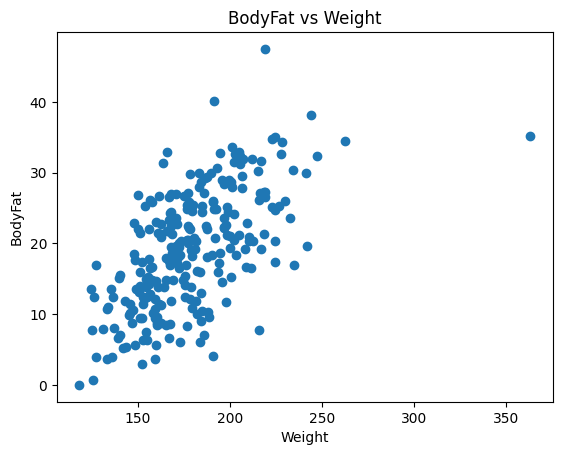

In [11]:
# scatter plot
plt.scatter(body.iloc[:, 3], body.iloc[:, 1])
plt.xlabel('Weight')
plt.ylabel('BodyFat')
plt.title('BodyFat vs Weight')
plt.show()

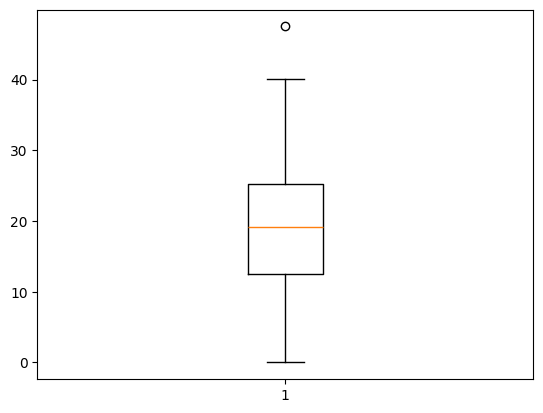

In [12]:
# box plot for BodyFat
plt.boxplot(body['BodyFat'])
plt.show()

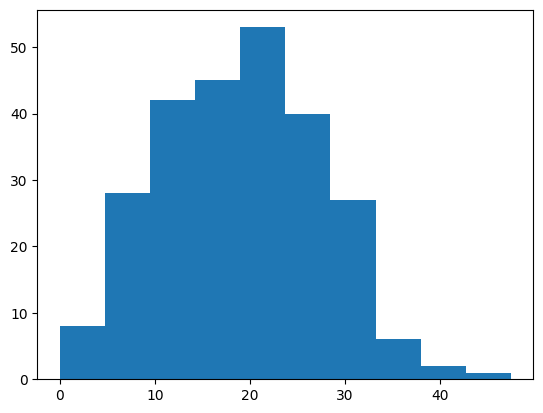

In [13]:
# histogrm for BodyFat
plt.hist(body['BodyFat'])
plt.show()

<Axes: >

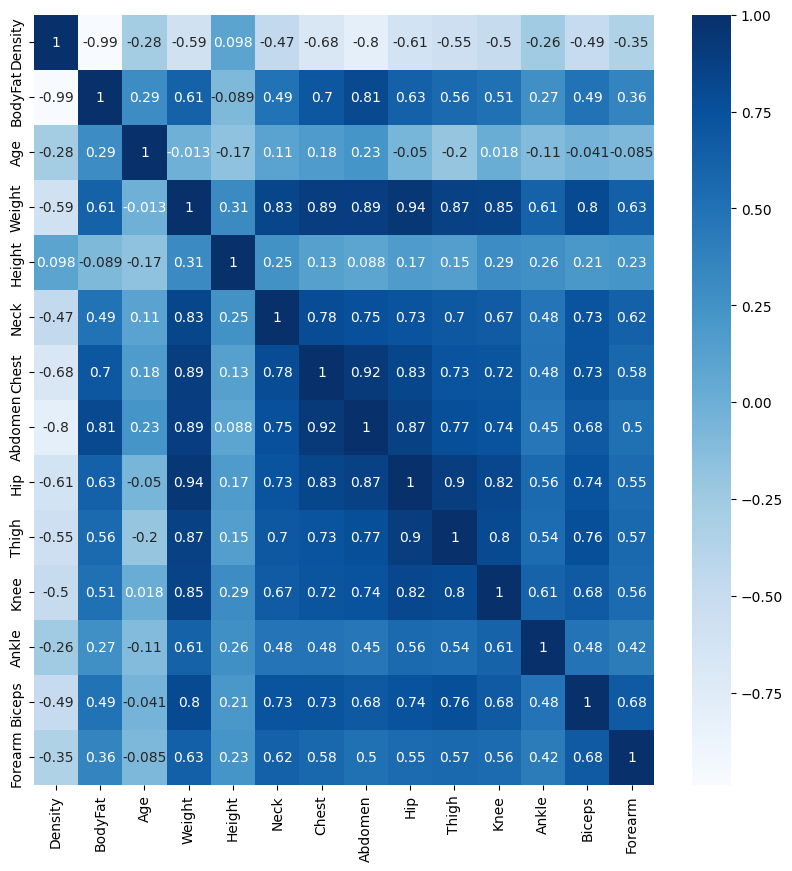

In [14]:
# create a heatmap using seaborn , cmap='PuRd', find correlation between bodyfat and other variables
plt.figure(figsize=(10, 10))
sns.heatmap(body.iloc[:, :-1].corr(), cmap='Blues', annot=True)

### Hypothesis testing

In [115]:
# implement pearson correlation test
statistic, pvalue = pearsonr(body['Weight'],body['BodyFat'])
statistic, pvalue

(np.float64(0.6141778599219683), np.float64(1.598665169336291e-27))

In [116]:
# implement a spearman test
statistic, pvalue = spearmanr(body['Weight'],body['BodyFat'])
statistic, pvalue

(np.float64(0.6146567125218673), np.float64(1.4194154266818445e-27))

In [117]:
# implementation of the t-test
stat, pvalue = ttest_1samp(body['BodyFat'], 19.150794)

# display the results
print(f"t-test statistic: {stat}")
print(f"p-value: {pvalue}")

# interpretation based on p-value
alpha = 0.05
if pvalue < alpha:
    print("Reject the null hypothesis")
else:
    print("Do not reject the null hypothesis")

t-test statistic: -0.8421187275659018
p-value: 0.4005231596837042
Do not reject the null hypothesis


### Simple regression for the bodyfat dataset

In [118]:
# select the independent variable X = age , and the dependent variable y = bodyfat
X = body.iloc[:,[2]].values
y = body.iloc[:, 1].values

In [119]:
# split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[55]
 [35]
 [56]
 [57]
 [58]
 [43]
 [44]
 [65]
 [32]
 [50]
 [55]
 [40]
 [44]
 [38]
 [51]
 [41]
 [57]
 [40]
 [67]
 [24]
 [41]
 [40]
 [61]
 [44]
 [40]
 [49]
 [35]
 [48]
 [43]
 [25]
 [64]
 [23]
 [35]
 [61]
 [35]
 [31]
 [49]
 [29]
 [55]
 [55]
 [27]
 [44]
 [55]
 [50]
 [46]
 [28]
 [47]
 [55]
 [54]
 [43]
 [50]
 [26]
 [44]
 [29]
 [41]
 [70]
 [49]
 [50]
 [43]
 [47]
 [72]
 [42]
 [48]
 [39]
 [56]
 [22]
 [40]
 [22]
 [41]
 [61]
 [40]
 [41]
 [46]
 [55]
 [68]
 [31]
 [65]
 [34]
 [46]
 [47]
 [66]
 [52]
 [47]
 [39]
 [38]
 [27]
 [63]
 [42]
 [26]
 [57]
 [32]
 [35]
 [26]
 [43]
 [53]
 [28]
 [46]
 [47]
 [49]
 [40]
 [23]
 [55]
 [67]
 [44]
 [36]
 [47]
 [37]
 [51]
 [32]
 [47]
 [28]
 [39]
 [40]
 [40]
 [26]
 [42]
 [50]
 [35]
 [40]
 [42]
 [28]
 [44]
 [47]
 [72]
 [54]
 [64]
 [46]
 [42]
 [37]
 [43]
 [34]
 [62]
 [54]
 [62]
 [47]
 [27]
 [53]
 [28]
 [33]
 [67]
 [48]
 [43]
 [41]
 [44]
 [65]
 [58]
 [26]
 [50]
 [27]
 [25]
 [54]
 [27]
 [24]
 [35]
 [51]
 [44]
 [43]
 [24]
 [81]
 [48]
 [61]
 [39]
 [52]
 [40]
 [39]
 [46]
 [37

In [120]:
# fit, train the linear regressor
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [121]:
# make predictions using the regressor on the training set
y_pred = regressor.predict(X_test)
y_pred

array([20.36863794, 16.58096003, 21.94683707, 17.84351933, 18.6326189 ,
       18.31697907, 19.73735829, 18.00133924, 22.42029681, 20.21081803,
       16.89659985, 15.16058081, 20.05299812, 19.26389855, 20.68427777,
       15.47622063, 23.20939638, 16.42314011, 20.99991759, 16.89659985,
       15.63404055, 18.15915916, 22.89375655, 18.6326189 , 19.10607864,
       19.26389855, 20.05299812, 18.00133924, 18.15915916, 18.31697907,
       19.57953838, 15.94968037, 16.73877994, 20.36863794, 22.89375655,
       17.84351933, 15.47622063, 18.31697907, 16.73877994, 20.05299812,
       15.79186046, 17.05441976, 18.15915916, 19.26389855, 17.21223968,
       22.10465699, 15.16058081, 18.94825872, 19.57953838, 18.31697907,
       15.94968037])

In [122]:
# make a prediction on one value of BodyFat
result = regressor.predict([[12.3]])
result

array([13.47190773])

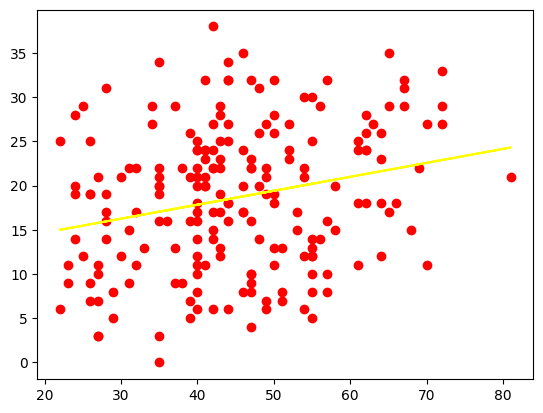

In [123]:
# plot the X train and the y_train on X train
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'yellow')

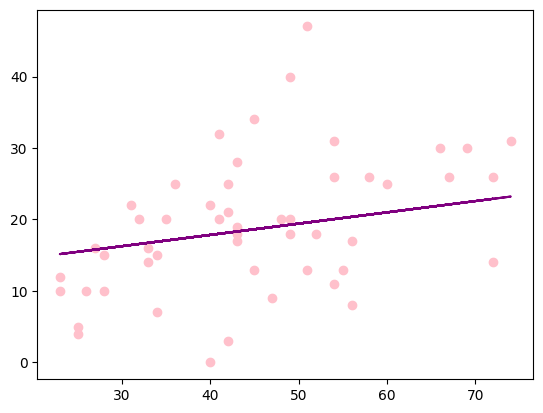

In [124]:
# plot the X test and the y_test on X test
plt.scatter(X_test, y_test, color = 'pink')
plt.plot(X_test, regressor.predict(X_test), color = 'purple')

In [125]:
# get the intercept nd the coefficent
b0 = regressor.intercept_
b1 = regressor.coef_
print('The intercept is:', b0)
print('The coefficent is:', b1[0])

The intercept is: 11.530722802445938
The coefficent is: 0.15781991320868327


In [126]:
# model evaluation
r2_score(y_test, y_pred)

0.14805007587116314

### Multiple Linear Regression

In [127]:
# Binning bodyfat into 4 bins
# y_binned1, bins = pd.cut(body['BodyFat'], bins=4, labels=[0,1,2,3], retbins=True)

In [128]:
body.head(1)

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,binned
0,1,12,23,154,67,36,93,85,94,59,37,21,32,27,17,0


In [129]:
# select all the independent variables , and the dependent variable y = BodyFat
X1 = body.iloc[:,[10,11,12]].values
y1 = body.iloc[:, 1].values

In [130]:
# split the dataset into train and test
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2)
print(X_train1)
print(X_test1)
print(y_train1)
print(y_test1)

[[39 24 37]
 [36 22 31]
 [38 21 31]
 [35 22 29]
 [38 21 31]
 [35 22 25]
 [33 19 25]
 [36 22 29]
 [36 23 34]
 [39 23 31]
 [36 22 29]
 [42 24 35]
 [34 21 30]
 [38 22 31]
 [40 24 33]
 [42 24 35]
 [37 21 34]
 [40 22 33]
 [39 22 31]
 [39 23 34]
 [36 23 34]
 [40 23 27]
 [38 23 31]
 [38 24 32]
 [38 22 31]
 [38 21 28]
 [37 23 30]
 [36 21 29]
 [38 21 30]
 [39 24 30]
 [37 21 29]
 [42 24 33]
 [40 22 33]
 [38 22 33]
 [35 21 30]
 [40 24 37]
 [44 25 37]
 [41 24 34]
 [40 24 33]
 [39 24 33]
 [42 23 32]
 [39 23 36]
 [41 25 35]
 [40 22 34]
 [39 24 28]
 [36 21 27]
 [36 22 31]
 [37 22 32]
 [38 21 30]
 [39 21 33]
 [37 23 29]
 [36 21 31]
 [37 21 31]
 [38 23 32]
 [40 24 33]
 [39 22 32]
 [37 21 30]
 [40 24 33]
 [36 21 31]
 [40 24 35]
 [38 23 35]
 [39 25 32]
 [34 21 27]
 [38 22 37]
 [42 23 33]
 [38 22 31]
 [38 22 29]
 [39 22 30]
 [38 22 29]
 [41 24 33]
 [40 24 36]
 [36 22 29]
 [36 22 30]
 [39 26 36]
 [38 24 28]
 [38 22 29]
 [34 22 27]
 [38 23 27]
 [38 23 35]
 [39 23 36]
 [39 25 31]
 [39 22 27]
 [35 20 28]
 [33

In [131]:
# fit, train the linear regressor
regressor1 = LinearRegression()
regressor1.fit(X_train1, y_train1)

LinearRegression()

In [132]:
# make predictions using the regressor on the training set
y_pred1 = regressor1.predict(X_test1)
y_pred1

array([29.56263193, 12.84836655, 18.32593889,  9.64837756, 15.08921834,
       23.14704002, 14.04561057, 16.30757999, 20.90618824, 12.86948419,
       15.50758274, 23.14704002, 19.90481575, 18.32593889, 24.98514132,
       22.28368986, 19.2850761 , 19.96816866, 18.52731413, 16.06396947,
       22.9034295 , 17.51032772, 25.76402093, 18.90344326, 12.66810895,
       16.48783759, 15.52870038, 26.56401818,  8.87531073, 30.80211122,
       20.56679067, 17.72731688, 15.88921558, 17.72731688, 14.88784309,
       17.504824  , 22.14566753, 14.08784585, 24.54565928, 18.72868937,
       25.32453889, 22.10343225, 25.96539617, 12.44561607, 11.06811445,
       20.704813  , 24.54565928, 23.94153355, 17.70619924, 19.14705378,
       17.72731688])

In [133]:
result1 = regressor1.predict([[37,21,32]])
result1

array([18.72868937])

In [134]:
# get the intercept nd the coefficent
b01 = regressor1.intercept_
b1 = regressor1.coef_
print('The intercept is:', b01)
print('The coefficent is:', b1)

The intercept is: -42.15807503647638
The coefficent is: [ 1.41973689 -0.82111489  0.79999725]


In [135]:
# model evaluation
r2_score(y_test1, y_pred1)

0.21298468641827606

### Logistic Regression

In [75]:
# change all datatypes in the random sampling set from continous to discrete to use logistic regression
body['Weight'] = body['Weight'].astype(int)
body['Height'] = body['Height'].astype(int)
body['BodyFat'] = body['BodyFat'].astype(int)
body['Age'] = body['Age'].astype(int)
body['Neck'] = body['Neck'].astype(int)
body['Chest'] = body['Chest'].astype(int)
body['Abdomen'] = body['Abdomen'].astype(int)
body['Hip'] = body['Hip'].astype(int)
body['Thigh'] = body['Thigh'].astype(int)
body['Knee'] = body['Knee'].astype(int)
body['Ankle'] = body['Ankle'].astype(int)
body['Biceps'] = body['Biceps'].astype(int)
body['Forearm'] = body['Forearm'].astype(int)
body['Wrist'] = body['Wrist'].astype(int)
body['Density'] = body['Density'].astype(int)
body.dtypes

,0
Density,int64
BodyFat,int64
Age,int64
Weight,int64
Height,int64
Neck,int64
Chest,int64
Abdomen,int64
Hip,int64
Thigh,int64


In [76]:
body.head(1)

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,binned
0,1,12,23,154,67,36,93,85,94,59,37,21,32,27,17,0


In [77]:
# Binning BodyFat into 3 equal-sized bins
y_binned, bins = pd.cut(body['BodyFat'], bins=2, labels=[0, 1], retbins=True)

In [78]:
body.head(1)

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,binned
0,1,12,23,154,67,36,93,85,94,59,37,21,32,27,17,0


In [79]:
# select the independent variable X = [Weight, Height] , and the dependent variable y = BodyFat
X2 = body.iloc[:,[3,4]].values
y2 = body.iloc[:, -1].values

In [80]:
# Train-test split using this binned target
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

In [81]:
# feature scaling
sc = StandardScaler()
X2_train = sc.fit_transform(X2_train)
X2_test = sc.transform(X2_test)

In [82]:
# fit the logistic regression model
clf = LogisticRegression()
clf.fit(X2_train, y2_train)

LogisticRegression()

In [83]:
# predict on the X test
y2_pred = clf.predict(X2_test)

In [85]:
# get the confusion matrix and accuracy score
cm = confusion_matrix(y2_test, y2_pred)
ac = accuracy_score(y2_test, y2_pred)
rc = recall_score(y2_test, y2_pred, average=None)
pr = precision_score(y2_test, y2_pred, average=None)
print("confusion matrix:\n",cm)
print("accuracy score:\n",ac)
print("recall score:\n",rc)
print("precision score:\n",pr)

confusion matrix:
 [[54  7]
 [ 7  8]]
accuracy score:
 0.8157894736842105
recall score:
 [0.8852459  0.53333333]
precision score:
 [0.8852459  0.53333333]


### KNN

In [86]:
# Binning BodyFat into 2 equal-sized bins
y2_binned, bins = pd.cut(body['BodyFat'], bins=2, labels=[0, 1], retbins=True)

In [87]:
# select the independent variable X = [Weight, Height] , and the dependent variable y = BodyFat
X3 = body.iloc[:,[3,4]].values
y3 = body.iloc[:, -1].values

In [88]:
# Train-test split using this binned target
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=42)

In [89]:
# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [90]:
# Feature scaling
sc = StandardScaler()
X3_train = sc.fit_transform(X3_train)
X3_test = sc.transform(X3_test)

In [91]:
# Fit the KNN model
clf = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
clf.fit(X3_train, y3_train)

KNeighborsClassifier()

In [92]:
# Predict on the X_test
y3_pred = clf.predict(X3_test)

In [93]:
# Get the confusion matrix and the accuracy score
cm = confusion_matrix(y3_test, y3_pred)
ac = accuracy_score(y3_test, y3_pred)
rc = recall_score(y3_test, y3_pred, average=None)
pr = precision_score(y3_test, y3_pred, average=None)
print("confusion matrix:\n", cm)
print("accuracy:", ac)
print("recall:", rc)
print("precision:", pr)

confusion matrix:
 [[47 14]
 [ 6  9]]
accuracy: 0.7368421052631579
recall: [0.7704918 0.6      ]
precision: [0.88679245 0.39130435]


### Naive Bayes

In [94]:
# Binning BodyFat into 2 equal-sized bins
yy_binned, bins = pd.cut(body['BodyFat'], bins=2, labels=[0, 1], retbins=True)
body['binned'] = yy_binned

In [95]:
# select the independent variable X = [Weight, Height] , and the dependent variable y = BodyFat
XX = body.iloc[:,[3,4]].values
yy = body.iloc[:, -1].values

In [96]:
# Train-test split using this binned target
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size=0.3, random_state=42)

In [97]:
XX_train.shape

(176, 2)

In [98]:
# Feature scaling
scc = StandardScaler()
XX_train = scc.fit_transform(XX_train)
XX_test = scc.transform(XX_test)

In [99]:
classifier = GaussianNB()
classifier.fit(XX_train, yy_train)

GaussianNB()

In [100]:
yy_pred = classifier.predict(XX_test)
accuracy_score(yy_test, yy_pred)

0.8026315789473685

In [101]:
# pedict one point
result = classifier.predict(scc.transform([[154, 67]]))
print(result)

[0]


In [102]:
yy_pred = classifier.predict(XX_test)
cm = confusion_matrix(yy_test, yy_pred)
print(cm)
accuracy_score(yy_test, yy_pred)

[[55  6]
 [ 9  6]]


0.8026315789473685

### Decision Tree

In [103]:
# Binning BodyFat into 2 equal-sized bins
y3_binned, bins = pd.cut(body['BodyFat'], bins=2, labels=[0, 1], retbins=True)

In [104]:
# select the independent variable X = [Weight, Height] , and the dependent variable y = BodyFat
X4 = body.iloc[:,[3,4]].values
y4 = body.iloc[:, -1].values

In [105]:
# Train-test split using this binned target
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.3, random_state=42)

In [106]:
# Feature scaling
sc = StandardScaler()
X4_train = sc.fit_transform(X4_train)
X4_test = sc.transform(X4_test)

In [107]:
# Fit the DT model
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X4_train, y4_train)

DecisionTreeClassifier(criterion='entropy')

In [108]:
# Predict on the X_test
y4_pred = clf.predict(X4_test)

In [109]:
# Get the confusion matrix and the accuracy score
cm = confusion_matrix(y4_test, y4_pred)
ac = accuracy_score(y4_test, y4_pred)
rc = recall_score(y4_test, y4_pred, average=None)
pr = precision_score(y4_test, y4_pred, average=None)
print("confusion matrix:\n", cm)
print("accuracy:", ac)
print("recall:", rc)
print("precision:", pr)

confusion matrix:
 [[42 19]
 [ 7  8]]
accuracy: 0.6578947368421053
recall: [0.68852459 0.53333333]
precision: [0.85714286 0.2962963 ]


### K-Means

In [110]:
# elect the clustering columns
X5 = body.iloc[:,[3,4]].values

In [111]:
body.head(1)

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,binned
0,1,12,23,154,67,36,93,85,94,59,37,21,32,27,17,0


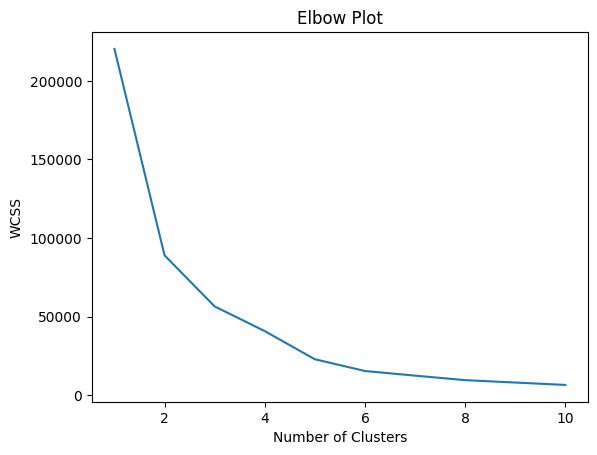

In [112]:
# clustering the elbow plot
wcss_list = []
for k in range(1,11):
  kmeans = KMeans(k)
  kmeans.fit(X5)
  wcss = kmeans.inertia_
  wcss_list.append(wcss)

plt.plot(range(1,11), wcss_list)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Plot')
plt.show()

In [113]:
# fit the clustering model with 2 clusters
kmeans = KMeans(n_clusters=2)
y_kmeans = kmeans.fit_predict(X5)
y_kmeans

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1], dtype=int32)

Cluster centers shape: (2, 2)


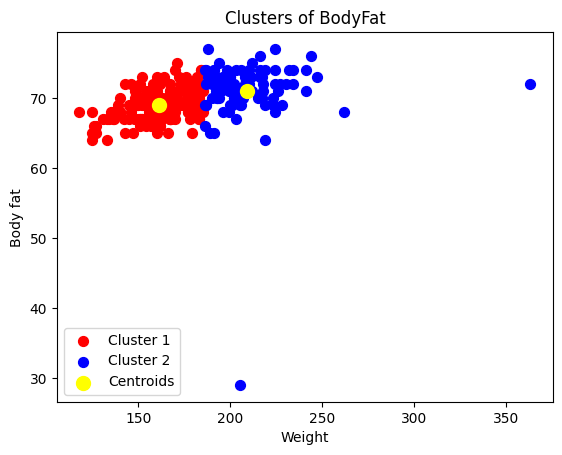

In [114]:
# plot the clusters
plt.scatter(X5[y_kmeans == 0, 0], X5[y_kmeans == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(X5[y_kmeans == 1, 0], X5[y_kmeans == 1, 1], s=50, c='blue', label='Cluster 2')

# Check cluster centers shape first
print("Cluster centers shape:", kmeans.cluster_centers_.shape)

# Plot centroids - corrected syntax and dimension access
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids')

plt.title('Clusters of BodyFat')
plt.xlabel('Weight')
plt.ylabel('Body fat')
plt.legend()
plt.show()